In [1]:
import numpy as np
import math
import pandas as pd
from timeit import default_timer as timer  
import datetime

from pandas_datareader import data
import pandas_datareader as web
import seaborn as sns

import datetime
from datetime import timezone
from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('dark_background')

from scipy.optimize import minimize
from scipy import stats
from random import sample
import statsmodels.api as sm


import statsmodels
from IPython.display import display, clear_output

from pathlib import Path


In [53]:
# DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_2g.csv"
# DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_2g_user_weights.csv"
DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_BERT_trainable_full.csv"
# DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_full_user_weights.csv"
# DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_full_user_weights_user_averaged.csv"

TRADING_STRATEGY_FILEPATH = './Trading Strategy'

## Inspecting the Datasets

In [ ]:
DATASET_FILEPATHS = ["./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_2g.csv"
,"./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_2g_user_weights.csv"
,"./Data Preprocessed/Dataset_sentiment_BERT_trainable_full.csv"
,"./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_full_user_weights.csv"
,"./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_full_user_weights_user_averaged.csv"]

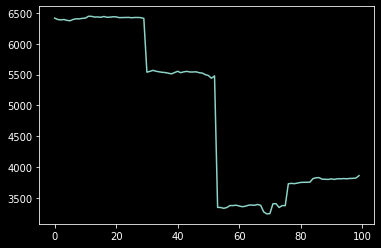

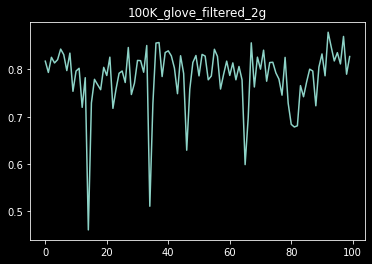

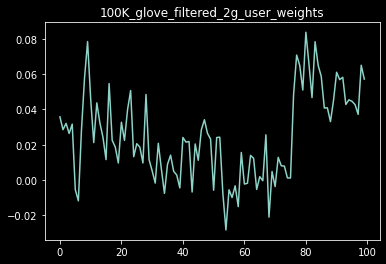

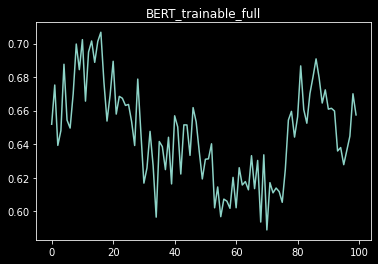

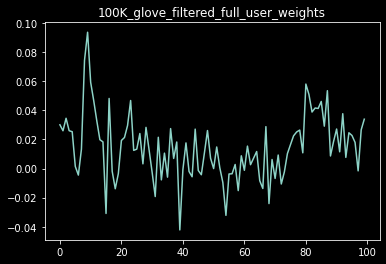

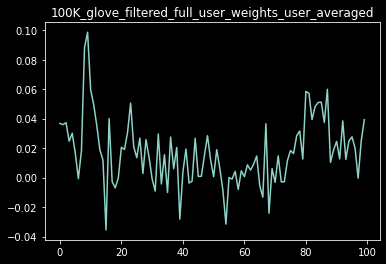

In [42]:

plt.plot(df['Open'][1200:1300].values)
plt.show()
for filepath in DATASET_FILEPATHS:
    df = pd.read_csv(filepath, index_col = 0)
    format = "%Y-%m-%d %H"
    df.index = [datetime.strptime(i, format) for i in df.index]
    plt.title(filepath[38:-4])
    plt.plot(df['Bitcoin'][1200:1300].values)
    plt.show()

In [52]:
for filepath in DATASET_FILEPATHS:
    df = pd.read_csv(filepath, index_col = 0)
    format = "%Y-%m-%d %H"
    df.index = [datetime.strptime(i, format) for i in df.index]
    #BTC price data of the next hour standarized
    Y = pd.DataFrame(df['Open']).astype(float)
    #Y = dataset_standarization(Y)

    #Textual data ('Bitcoin' topic popularity) of the last hour standarized
    X = pd.DataFrame(df['Bitcoin_median']).astype(float)
    #X = dataset_standarization(X)
    Y.index = X.index

    X = sm.add_constant(X)

    model = sm.OLS(Y, X, missing = 'drop').fit()
    print(filepath[38:-4])
    print(model.summary())

100K_glove_filtered_2g
                            OLS Regression Results                            
Dep. Variable:                   Open   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.716
Date:                Tue, 15 Jun 2021   Prob (F-statistic):              0.190
Time:                        22:46:49   Log-Likelihood:                -13248.
No. Observations:                1428   AIC:                         2.650e+04
Df Residuals:                    1426   BIC:                         2.651e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5495.

In [63]:
df = pd.read_csv(DATASET_FILEPATH, index_col = 0)
format = "%Y-%m-%d %H"
df.index = [datetime.strptime(i, format) for i in df.index]
df

,Bitcoin,Bitcoin_median,Open
2017-09-13 01:00:00,0.614933,0.660034,4128.005439
2017-09-13 02:00:00,0.620224,0.673658,4066.801167
2017-09-13 03:00:00,0.582891,0.604611,3999.225167
2017-09-13 04:00:00,0.599718,0.646221,3959.409667
2017-09-13 05:00:00,0.562789,0.566217,3995.046667
...,...,...,...
2019-01-22 18:00:00,0.658323,0.707379,3584.926897
2019-01-22 19:00:00,0.642840,0.699695,3585.858545
2019-01-22 20:00:00,0.658940,0.686578,3585.295893
2019-01-22 21:00:00,0.654965,0.703751,3579.910755


## Trading Strategy Backtesting <a class="anchor" id="section_5_3"></a>

In [4]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.append(TRADING_STRATEGY_FILEPATH)
from custom_trading_engine import customNLP
from signals import *
from strategies import *

In [ ]:
#best strategy play the opposite (with stoploss)
cash = []
for stop in range(1, 50):
    signal = Signal2(df['Bitcoin'])
    strategy = BitcoinNLPStrategy2()
    strategy.add_signal(signal)
    algo = customNLP(100000, df['Open'], strategy)
    algo.set_stoploss(stop/1000)
    
    algo.run(split = True, verbose = False)
    cash.append(algo.cash)
#plt.plot(list(algo.metrics['Portfolio Marked']))

In [ ]:
plt.plot(cash)

In [ ]:
np.min(df['Bitcoin'].values)

In [69]:
signal = Signal2(df['Bitcoin_median'])
strategy = BitcoinNLPStrategy2()
strategy.add_signal(signal)
algo = customNLP(100000, df['Open'], strategy)
#algo.set_stoploss(0.01)

algo.run(split = True)

C:\Users\Konst\Desktop\PythonNotebooks\TradingNLP\./Trading Strategy\signals.py:20: RuntimeWarning: invalid value encountered in double_scalars
  return -10000 * (self.data[datetime] - mean) / stdv


selling  10000.0  BTC at  4066.801166666666  $
closing  -10000.0  BTC at  3999.2251666666666  $
buying  13894.653757684728  BTC at  3999.2251666666666  $
closing  13894.653757684728  BTC at  3959.409666666667  $
selling  34.90204698347285  BTC at  3959.409666666667  $
closing  -34.90204698347285  BTC at  3995.046666666667  $
buying  16203.133756127774  BTC at  3995.046666666667  $
closing  16203.133756127774  BTC at  4005.1322641509432  $
buying  4848.244683413568  BTC at  4005.1322641509432  $
closing  4848.244683413568  BTC at  3982.99  $
buying  8670.907253592532  BTC at  3982.99  $
closing  8670.907253592532  BTC at  3951.8985  $
selling  14425.99019124014  BTC at  3951.8985  $
closing  -14425.99019124014  BTC at  3969.537118644068  $
buying  5293.17133874398  BTC at  3969.537118644068  $
closing  5293.17133874398  BTC at  3839.3781666666655  $
selling  18929.434377278714  BTC at  3839.3781666666655  $
closing  -18929.434377278714  BTC at  3833.9163333333327  $
buying  1689.9682751

closing  -847.2481777473788  BTC at  5708.544915254237  $
selling  13371.16331965807  BTC at  5708.544915254237  $
closing  -13371.16331965807  BTC at  5760.29559322034  $
buying  5062.098895652996  BTC at  5760.29559322034  $
closing  5062.098895652996  BTC at  5760.29559322034  $
buying  10000.0  BTC at  6071.602833333333  $
closing  10000.0  BTC at  6085.6359649122805  $
selling  5550.005132081921  BTC at  6085.6359649122805  $
closing  -5550.005132081921  BTC at  6074.8161666666665  $
selling  12214.425154539385  BTC at  6074.8161666666665  $
closing  -12214.425154539385  BTC at  6093.565964912281  $
buying  6882.037326680507  BTC at  6093.565964912281  $
closing  6882.037326680507  BTC at  6073.152166666667  $
selling  18540.463777465593  BTC at  6073.152166666667  $
closing  -18540.463777465593  BTC at  6094.0425  $
buying  5326.715112114282  BTC at  6094.0425  $
closing  5326.715112114282  BTC at  6102.605500000001  $
buying  2189.43734386623  BTC at  6102.605500000001  $
closin

closing  -10000.0  BTC at  10933.428000000002  $
buying  1493.5732714633334  BTC at  10933.428000000002  $
closing  1493.5732714633334  BTC at  11042.695000000002  $
buying  2960.114288298211  BTC at  11042.695000000002  $
closing  2960.114288298211  BTC at  11080.04254237288  $
selling  13841.323184779521  BTC at  11080.04254237288  $
closing  -13841.323184779521  BTC at  11584.563333333332  $
buying  2528.621269392416  BTC at  11584.563333333332  $
closing  2528.621269392416  BTC at  11646.165666666668  $
selling  6005.893989741235  BTC at  11646.165666666668  $
closing  -6005.893989741235  BTC at  11589.7535  $
buying  5103.593243155146  BTC at  11589.7535  $
closing  5103.593243155146  BTC at  11725.338333333331  $
selling  7991.982455212391  BTC at  11725.338333333331  $
closing  -7991.982455212391  BTC at  11721.536166666669  $
buying  15172.200313243437  BTC at  11721.536166666669  $
closing  15172.200313243437  BTC at  11687.338666666668  $
buying  5127.89752340913  BTC at  116

closing  2241.0875713636046  BTC at  8063.273333333332  $
selling  10929.749059580796  BTC at  8063.273333333332  $
closing  -10929.749059580796  BTC at  8166.680833333333  $
selling  1414.8966022894365  BTC at  8166.680833333333  $
closing  -1414.8966022894365  BTC at  8148.557833333333  $
selling  18888.918610027456  BTC at  8148.557833333333  $
closing  -18888.918610027456  BTC at  8221.684833333333  $
selling  2515.2003145681433  BTC at  8221.684833333333  $
closing  -2515.2003145681433  BTC at  8252.76433333333  $
selling  1233.111566063202  BTC at  8252.76433333333  $
closing  -1233.111566063202  BTC at  8243.642  $
selling  2460.7783402947352  BTC at  8243.642  $
closing  -2460.7783402947352  BTC at  8327.6495  $
selling  16533.210341421203  BTC at  8327.6495  $
closing  -16533.210341421203  BTC at  8284.720666666666  $
selling  10000.0  BTC at  8524.042833333333  $
closing  -10000.0  BTC at  8587.785166666667  $
buying  8331.264712505335  BTC at  8587.785166666667  $
closing  8

closing  2344.835308730261  BTC at  9087.233833333334  $
buying  8121.499728983991  BTC at  9087.233833333334  $
closing  8121.499728983991  BTC at  9106.035689655171  $
buying  21475.7068404723  BTC at  9106.035689655171  $
closing  21475.7068404723  BTC at  9089.537166666669  $
buying  12472.625660443566  BTC at  9089.537166666669  $
closing  12472.625660443566  BTC at  9058.739999999998  $
selling  3333.7241986909135  BTC at  9058.739999999998  $
closing  -3333.7241986909135  BTC at  9058.739999999998  $
selling  10000.0  BTC at  8930.021833333334  $
closing  -10000.0  BTC at  8974.505000000001  $
buying  11023.527129193559  BTC at  8974.505000000001  $
closing  11023.527129193559  BTC at  8935.044166666667  $
selling  204.94929778166866  BTC at  8935.044166666667  $
closing  -204.94929778166866  BTC at  8767.4285  $
selling  901.4126698263785  BTC at  8767.4285  $
closing  -901.4126698263785  BTC at  8787.331666666667  $
buying  7048.471987639807  BTC at  8787.331666666667  $
closi

closing  -7091.876480463217  BTC at  7422.151666666667  $
buying  1377.849106607188  BTC at  7422.151666666667  $
closing  1377.849106607188  BTC at  7412.3826666666655  $
selling  7585.528577544894  BTC at  7412.3826666666655  $
closing  -7585.528577544894  BTC at  7427.416166666666  $
buying  1307.1009728830418  BTC at  7427.416166666666  $
closing  1307.1009728830418  BTC at  7429.556500000001  $
selling  7126.16394837716  BTC at  7429.556500000001  $
closing  -7126.16394837716  BTC at  7488.4941666666655  $
buying  3559.3683047739505  BTC at  7488.4941666666655  $
closing  3559.3683047739505  BTC at  7465.0805  $
buying  288.85598322606876  BTC at  7465.0805  $
closing  288.85598322606876  BTC at  7492.237333333334  $
buying  7038.336054283445  BTC at  7492.237333333334  $
closing  7038.336054283445  BTC at  7461.994500000001  $
selling  455.1258882298302  BTC at  7461.994500000001  $
closing  -455.1258882298302  BTC at  7450.161833333334  $
selling  277.70875147385897  BTC at  745

closing  -16139.229832824085  BTC at  6637.389166666667  $
selling  5118.103706193226  BTC at  6637.389166666667  $
closing  -5118.103706193226  BTC at  6597.452000000001  $
buying  1987.6341105637691  BTC at  6597.452000000001  $
closing  1987.6341105637691  BTC at  6599.032  $
selling  10853.000064674841  BTC at  6599.032  $
closing  -10853.000064674841  BTC at  6529.2025  $
selling  7183.944481297532  BTC at  6529.2025  $
closing  -7183.944481297532  BTC at  6420.338  $
buying  3300.512560571032  BTC at  6420.338  $
closing  3300.512560571032  BTC at  6363.6365  $
buying  18006.3345290334  BTC at  6363.6365  $
closing  18006.3345290334  BTC at  6368.289  $
buying  5637.165509332367  BTC at  6368.289  $
closing  5637.165509332367  BTC at  6376.648833333334  $
buying  13229.325111845274  BTC at  6376.648833333334  $
closing  13229.325111845274  BTC at  6361.08  $
selling  10509.073171438575  BTC at  6361.08  $
closing  -10509.073171438575  BTC at  6373.300666666667  $
buying  6097.229

closing  5848.885323466383  BTC at  6450.419818181817  $
buying  18742.613170308112  BTC at  6450.419818181817  $
closing  18742.613170308112  BTC at  6407.8685000000005  $
selling  475.0381252918908  BTC at  6407.8685000000005  $
closing  -475.0381252918908  BTC at  6395.521694915254  $
buying  16560.591136317486  BTC at  6395.521694915254  $
closing  16560.591136317486  BTC at  6342.644  $
buying  8435.971734991415  BTC at  6342.644  $
closing  8435.971734991415  BTC at  6303.835333333333  $
selling  8106.388855937663  BTC at  6303.835333333333  $
closing  -8106.388855937663  BTC at  6230.013500000002  $
buying  4230.005806682836  BTC at  6230.013500000002  $
closing  4230.005806682836  BTC at  6233.339166666668  $
buying  13655.911804375339  BTC at  6233.339166666668  $
closing  13655.911804375339  BTC at  6269.609999999999  $
buying  5602.59249531664  BTC at  6269.609999999999  $
closing  5602.59249531664  BTC at  6262.333965517241  $
buying  20708.755574316245  BTC at  6262.333965

closing  -1441.898624918973  BTC at  6533.715555555556  $
selling  8177.189805948515  BTC at  6533.715555555556  $
closing  -8177.189805948515  BTC at  6536.002456140352  $
selling  13736.629600261147  BTC at  6536.002456140352  $
closing  -13736.629600261147  BTC at  6563.913333333334  $
selling  7001.570351940326  BTC at  6563.913333333334  $
closing  -7001.570351940326  BTC at  6552.622413793104  $
selling  15524.106060684713  BTC at  6552.622413793104  $
closing  -15524.106060684713  BTC at  6553.607999999999  $
selling  1728.9342345736948  BTC at  6553.607999999999  $
closing  -1728.9342345736948  BTC at  6568.4169811320735  $
selling  10500.047015301507  BTC at  6568.4169811320735  $
closing  -10500.047015301507  BTC at  6565.003529411764  $
buying  18235.236401712504  BTC at  6565.003529411764  $
closing  18235.236401712504  BTC at  6576.08474576271  $
buying  6208.321366957572  BTC at  6576.08474576271  $
closing  6208.321366957572  BTC at  6570.238800000001  $
selling  6783.12

closing  -8435.144591162789  BTC at  3755.017843137255  $
selling  15925.475618338565  BTC at  3755.017843137255  $
closing  -15925.475618338565  BTC at  3756.018510638298  $
selling  873.1211523573597  BTC at  3756.018510638298  $
closing  -873.1211523573597  BTC at  3756.6486  $
buying  1212.5435131373656  BTC at  3756.6486  $
closing  1212.5435131373656  BTC at  3813.724423076923  $
selling  53.255482642055185  BTC at  3813.724423076923  $
closing  -53.255482642055185  BTC at  3829.1436363636367  $
selling  18271.899155099138  BTC at  3829.1436363636367  $
closing  -18271.899155099138  BTC at  3830.8128571428574  $
selling  9209.014728466402  BTC at  3830.8128571428574  $
closing  -9209.014728466402  BTC at  3810.960588235294  $
buying  521.585345143845  BTC at  3810.960588235294  $
closing  521.585345143845  BTC at  3802.030377358491  $
buying  1417.6040631263693  BTC at  3802.030377358491  $
closing  1417.6040631263693  BTC at  3812.801428571428  $
selling  1664.9406083602655  BTC

In [10]:
# signal = RandomSignal()
# strategy = BitcoinBNHStrategy()
# strategy.add_signal(signal)
# algo = customNLP(100000, df['Open'], strategy)
# #algo.set_stoploss(0.01)
# algo.run(split = True)

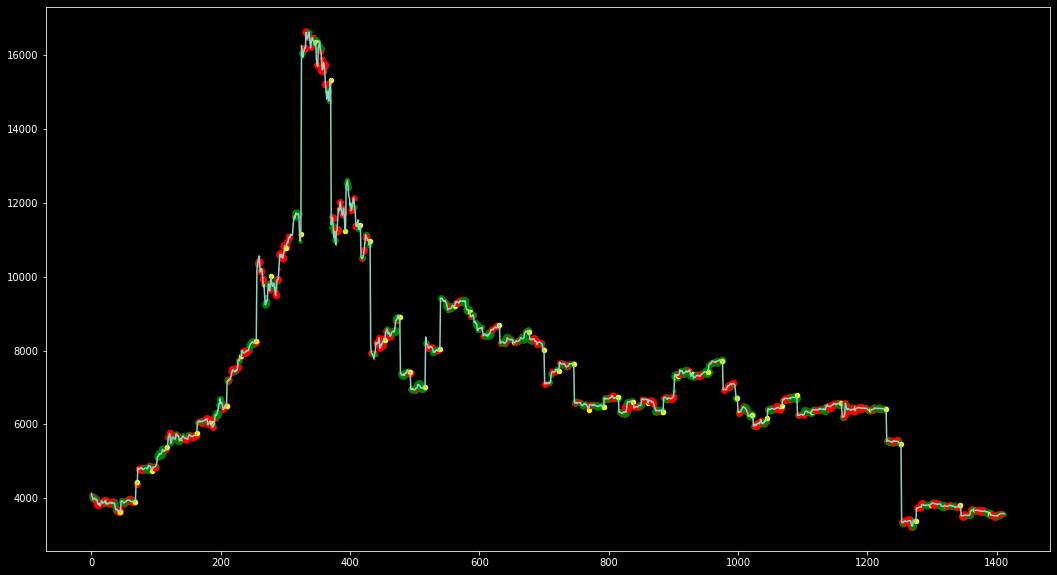

In [70]:
algo.plot()

In [71]:
algo.cash

97662.80488841492

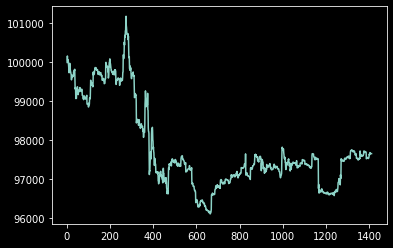

In [72]:
plt.plot(list(algo.metrics['Portfolio Marked']))

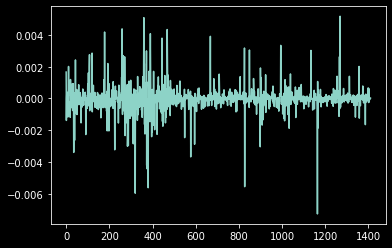

In [73]:
returns = algo.metrics['Portfolio Marked'].pct_change().dropna().values
plt.plot(returns)

In [74]:
sr = ((np.mean(returns)-0.035/24/365)/np.std(returns)*math.sqrt(365*24))
sr

-2.362688517506485

In [62]:
algo.metrics.iloc[100:120]

,Position USD,Price USD,Cash USD,Portfolio Marked
2017-10-12 06:00:00,-6541.162217,4893.055593,105814.658637,99273.49642
2017-10-12 07:00:00,-2824.805096,4919.088833,102063.499613,99238.694517
2017-10-12 08:00:00,-17156.040133,5095.507333,116293.425668,99137.385535
2017-10-12 09:00:00,-17156.040133,5095.507333,116293.425668,98992.921033
2017-10-12 10:00:00,780.07128,5145.027667,98190.584473,98970.655754
2017-10-12 11:00:00,-12927.747152,5201.749667,111907.002899,98979.255747
2017-10-12 12:00:00,-12927.747152,5201.749667,111907.002899,98975.720866
2017-10-12 13:00:00,-4148.246229,5197.422833,103138.25532,98990.009092
2017-10-12 14:00:00,3625.699408,5199.343167,95362.776998,98988.476406
2017-10-12 15:00:00,-10301.325652,5250.5575,109325.515757,99024.190105


In [ ]:
x = pd.DataFrame(algo.metrics['Position USD'])

In [ ]:
x = x.dropna()
x[x['Position USD']!=0].index.size

### Generate Random Strategies

In [ ]:
strategy = BitcoinRandomStrategy()
sr = []
for i in range(0,100):
    loading_bar(i, 99)
    algo = customNLP(100000, df['Open'], strategy)
    algo.set_stoploss(0.01)
    algo.run(split = True, verbose = False)
    returns = algo.metrics['Portfolio Marked'].pct_change().dropna().values
    sr.append((np.mean(returns)-0.035/24/365)/np.std(returns)*math.sqrt(365*24))
np.mean(sr)

In [ ]:
np.median(sr)

## Plotting and Testing

In [ ]:
#Prints a simple loading bar
def loading_bar(n,N, message = ''):
    prc  = math.floor(n/N*100)
    a = prc*'#'
    b = (100-prc)*'_'
    clear_output(wait=True)
    display('|' + a + b + '|' + str(prc) + '%' + " " + message)